In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from loader import *
from models import *
from utils import *
from plotting import *

In [3]:
# load_path_model = 'E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\Test simulations\\raw_output\\results\\jupyter_ver9copy\\models\\seq_len3_b1norm_noclip_3out_16-32-64-128.keras'
# model = keras.models.load_model(load_path_model, custom_objects={'softmax_categorical':softmax_categorical})

In [4]:
load_path_model = 'E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\Raw_output\\models\\frame-by-frame.keras'
model = keras.models.load_model(load_path_model, custom_objects={'softmax_categorical':softmax_categorical})

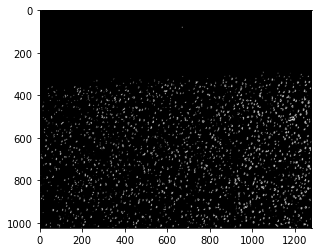

In [5]:
folder_path = 'E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\From erik\\darkfield higher mag'
im_stack = get_image_stack(
    outputs=[0], 
    folder_path=folder_path, 
    frame_im0=0, 
    im_size_width=1280, 
    im_size_height=1024,
    im_resize_width=1280, 
    im_resize_height=1024,
    function_img=[normalize_image],
    function_diff=[normalize_image])

# plot_image_stack(im_stack)
# plot_prediction(model=model, im_stack=im_stack)
plt.imshow(model.predict(im_stack)[0,:,:,1]>0.5, cmap='gray')

In [6]:
positions = extract_positions(
    no_of_frames=100, 
    outputs=[0],
    folder_path=folder_path, 
    frame_im0=0, 
    im_size_width=1280, 
    im_size_height=1024,
    im_resize_width=1280, 
    im_resize_height=1024,
    model=model, 
    layer=1, 
    value_threshold=0.5,
    function_img=[lambda im: -im, normalize_image],
    function_diff=[normalize_image])


In [7]:
list_of_plankton = assign_positions_to_planktons(positions, max_dist=10, time_threshold = 5, extrapolate=True)
list_of_plankton = interpolate_gaps_in_plankton_positions(list_of_plankton=list_of_plankton)
list_of_plankton = trim_list_from_stationary_planktons(list_of_plankton=list_of_plankton, min_distance=1)

plankton_track, plankton_dont_track = split_plankton(percentage_threshold=0.05, list_of_plankton=list_of_plankton)

Since the kernel freezes when trying to plot and save all images in one go we divide it up into parts and go at it 10 images at a time.

In [65]:
# im_size_width=1280
# im_size_height=1024
# color_plankton_track = 'b'
# save_path = 'E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\\Oxhyris\\frame by frame'
# frame_name = 'track'
# file_type = '.jpg'
# save_images = 1
# frame_im0 = 60
# no_of_frames = 10
# pixel_length_ratio=1
# x_axis_label='pixels'
# y_axis_label='pixels'

# positions_track = extract_positions_from_list(plankton_track)[frame_im0 - 5:frame_im0 + no_of_frames + 1,:]
# list_paths = os.listdir(folder_path)

# for i, j in enumerate(range(frame_im0, frame_im0 + no_of_frames)):
#     fig, ax = plt.subplots(figsize=(10, 10), constrained_layout=True)
#     im = cv2.imread(folder_path +'\\' + list_paths[j])
#     dims = im.shape

#     scale_height = dims[0]/im_size_height
#     scale_width = dims[1]/im_size_width


#     ax.plot(scale_width*positions_track[i:i+6, 1::2],scale_height*positions_track[i:i+6, 0::2], c=color_plankton_track,linewidth=1)
#     ax.scatter(scale_width*positions_track[i+5,1::2], scale_height*positions_track[i+5,0::2], s=100, marker='.', facecolor='none', edgecolors=color_plankton_track)

#     ax.imshow(im, cmap="gray")

    
#     locs, labels = plt.xticks()
#     labels = [int(float(item)*pixel_length_ratio) for item in locs]
#     plt.xticks(locs[1:-1], labels[1:-1])
#     plt.xlabel(x_axis_label)
#     plt.xlabel(y_axis_label)
#     plt.title('Planktons')
    
#     if save_images: 
#         plt.savefig(save_path + '\\' + frame_name + '%0{}d'.format(len(str(no_of_frames))) % j + file_type)
#         plt.close(fig)
#     else:
        
#         plt.show()

In [ ]:
# plot_and_save_track(no_of_frames=100,
#                     plankton_track=plankton_track,
#                     plankton_dont_track=plankton_dont_track,
#                     folder_path=folder_path,
#                     frame_im0=60,
#                     save_images=1,
#                     show_plankton_track = True,
#                     show_plankton_dont_track = 0,
#                     show_numbers_track = 0,
#                     show_numbers_dont_track = 0,
#                     show_numbers_specific_plankton = False,
#                     show_specific_plankton = False,
#                     specific_plankton = None,
#                     color_plankton_track = 'b',
#                     color_plankton_dont_track = 'r',
#                     color_specific_plankton = 'w',
#                     save_path = 'E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\\Oxhyris\\frame by frame',
#                     frame_name = 'track',
#                     file_type = '.jpg')

In [4]:
# make_video(frame_im0=0,
#            folder_path='E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\\Oxhyris\\frame by frame', 
#            save_path='E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\\Oxhyris\\frame-by-frame.avi', 
#            fps=7, 
#            no_of_frames=55)

In [ ]:
import xml.etree.ElementTree as ET

def get_found_plankton_from_xml(path, no_timesteps, var_str):
    tree = ET.parse(path)
    root = tree.getroot()


    found_plankton_at_timestep = np.zeros(no_timesteps)

    for particle in root.iter():
        my_dict = particle.attrib
        if var_str in my_dict:
            found_plankton_at_timestep[int(float(my_dict[var_str]))] += 1
    return found_plankton_at_timestep


found_plankton_at_timestep_net = get_found_plankton_at_timestep(plankton_track)     


path = "E:\\Documents\\Master\\exjobb\\software\\Tracking\\darkfield higher mag_Tracks.xml"
no_timesteps = 102
found_plankton_at_timestep_alg = get_found_plankton_from_xml(path, no_timesteps, 't')


track_durations_net = get_track_durations(plankton_track)


track_durations_alg = get_found_plankton_from_xml(path, no_timesteps, 'nSpots')

Text(0.76, 0.18, '$\\mu=3142.21$\n$\\mu=2362.55$')

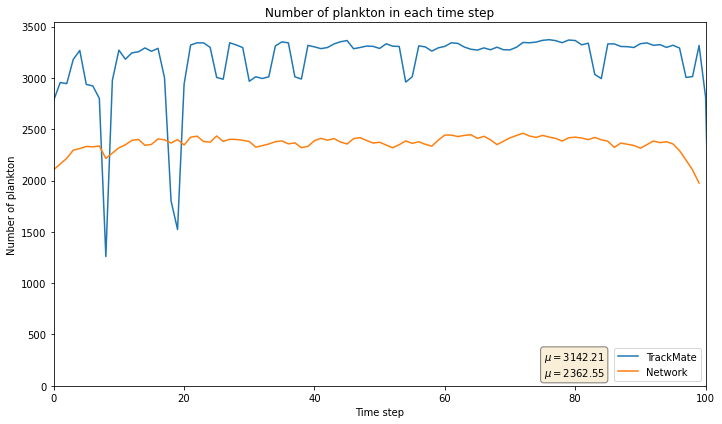

In [12]:
ax = plt.figure(figsize=(10,6))

plt.plot(found_plankton_at_timestep_alg)
mualg = np.mean(found_plankton_at_timestep_alg)

plt.plot(found_plankton_at_timestep_net)
munet= np.mean(found_plankton_at_timestep_net)


plt.legend(['TrackMate', 'Network'], loc='lower right')

plt.xlabel('Time step')
plt.ylabel('Number of plankton')
plt.title('Number of plankton in each time step')
plt.tight_layout()


plt.xlim(left=0)
plt.xlim(right=100)

plt.ylim(bottom=0)

textstr = '\n'.join((
    r'$\mu=%.2f$' % (mualg, ),
    r'$\mu=%.2f$' % (munet, )
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.76, 0.18, textstr, fontsize=10,
        verticalalignment='top', bbox=props)

(-5.49, 100.0)

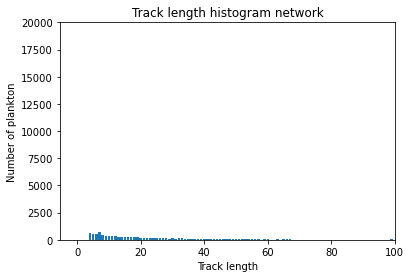

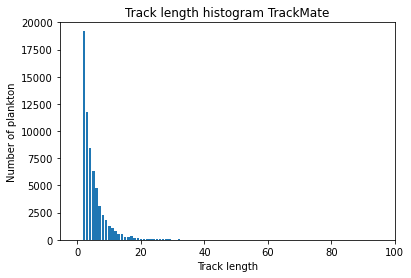

In [13]:
plt.figure()
plt.bar(range(len(track_durations_net)), track_durations_net)
plt.xlabel('Track length')
plt.ylabel('Number of plankton')
plt.title('Track length histogram network')
plt.ylim(top=20000)
plt.xlim(right=100)



plt.figure()
plt.bar(range(len(track_durations_alg)), track_durations_alg)
plt.xlabel('Track length')
plt.ylabel('Number of plankton')
plt.title('Track length histogram TrackMate')
plt.ylim(top=20000)
plt.xlim(right=100)